# LIBROSA

In [8]:
import pandas as pd
import numpy as np
import os
import math

import librosa
import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [8]:
# #PATH
path_info = "C:/Users/USER/Downloads/Tugas Akhir/dataset/annotations/"
path_to_file = "C:/Users/USER/Downloads/Tugas Akhir/dataset/clips_45sec_wav/"

# path_info = "F:/178/Tugas Akhir/dataset/annotations/"
# path_to_fitur = "F:/178/Tugas Akhir/dataset/coba fitur/"
# path_to_file = "F:/178/Tugas Akhir/dataset/clips_45sec_wav/"
# path_to_experiment ="F:/178/Tugas Akhir/dataset/experiment/"

In [ ]:
# ipd.Audio(data=y, rate=sr) # load a NumPy array

In [17]:
# LOAD

# 1. Get the file path to the included audio example
# filename = librosa.util.example_audio_file()
path = path_to_file+"2.wav"

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(path,sr=22050,duration=45.0,mono=False) #load 45 and with same freq

D = np.abs(librosa.stft(y))
times = librosa.frames_to_time(np.arange(D.shape[1]))

In [26]:
# D = librosa.stft(y)
# Smag, p = librosa.magphase(D)
# S = librosa.amplitude_to_db(Smag, top_db=None)
# Sinv = librosa.db_to_amplitude(S)
# y2 = librosa.istft(Sinv * p)
# y3 = librosa.istft(D)
# print(y.max(), y2.max(), y3.max())
hop_length = 256
frame_length = 512

Bentuk matrix : (13, 1938)
Nilai Max matrix : 171.18995892631108
Nilai Min matrix : -563.7945778970047


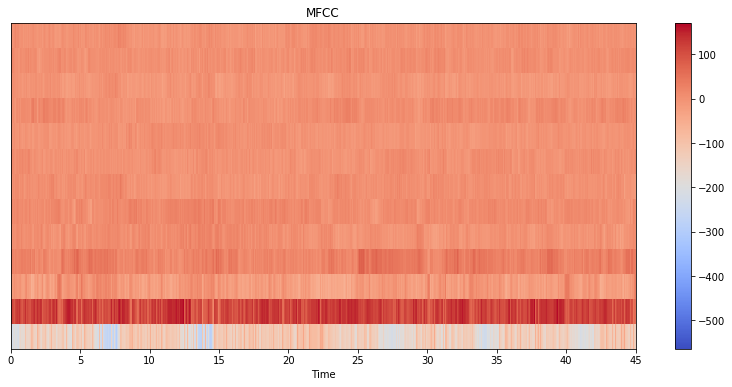

In [5]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13) #13 is default dimension frame 512
print("Bentuk matrix :",mfcc.shape)
print("Nilai Max matrix :",mfcc.max())
print("Nilai Min matrix :",mfcc.min())
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

Bentuk matrix : (24, 1938)
Nilai Max matrix : 1.0
Nilai Min matrix : 0.0018126317848461341


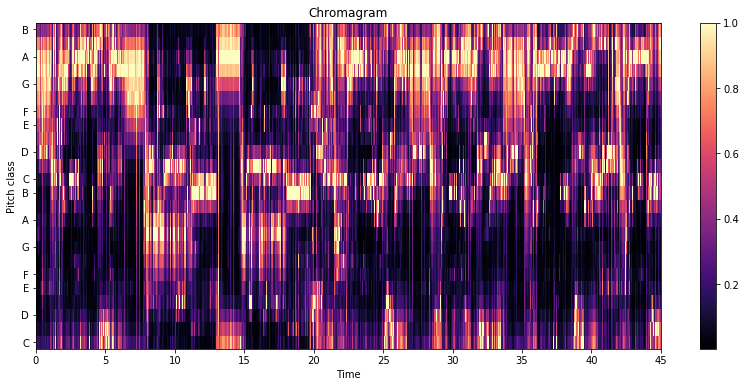

In [6]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=24)
print("Bentuk matrix :",chroma.shape)
print("Nilai Max matrix :",chroma.max())
print("Nilai Min matrix :",chroma.min())

plt.figure(figsize=(14, 6))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.show()

Bentuk matrix : (1, 1938)
Nilai Max matrix : 3946.8779586637343
Nilai Min matrix : 930.6076819144585


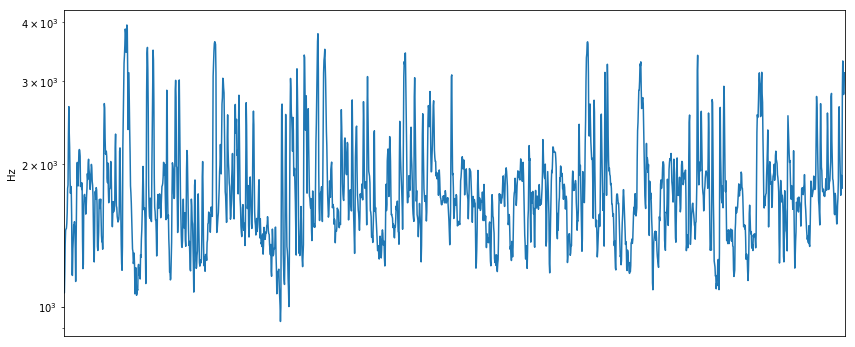

In [7]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
print("Bentuk matrix :",cent.shape)
print("Nilai Max matrix :",cent.max())
print("Nilai Min matrix :",cent.min())

plt.figure(figsize=(14, 6))
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.show()

Bentuk matrix : (1938,)
Nilai Max matrix : 14.059784102881844
Nilai Min matrix : 0.0


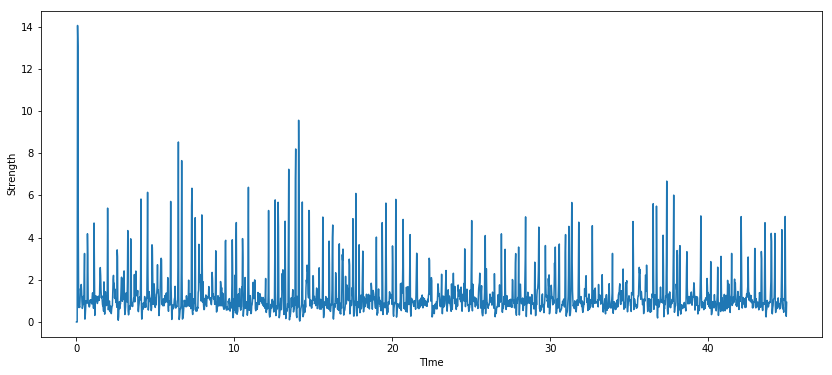

In [8]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr) #1 is default dimension 512 frame
print("Bentuk matrix :",onset_env.shape)
print("Nilai Max matrix :",onset_env.max())
print("Nilai Min matrix :",onset_env.min())

plt.figure(figsize=(14, 6))

plt.ylabel('Strength')
plt.xlabel('TIme')
plt.plot(times, onset_env, label='Mean (mel)')
plt.show()

Bentuk matrix : (1, 1938)
Nilai Max matrix : 8064.1845703125
Nilai Min matrix : 1701.123046875


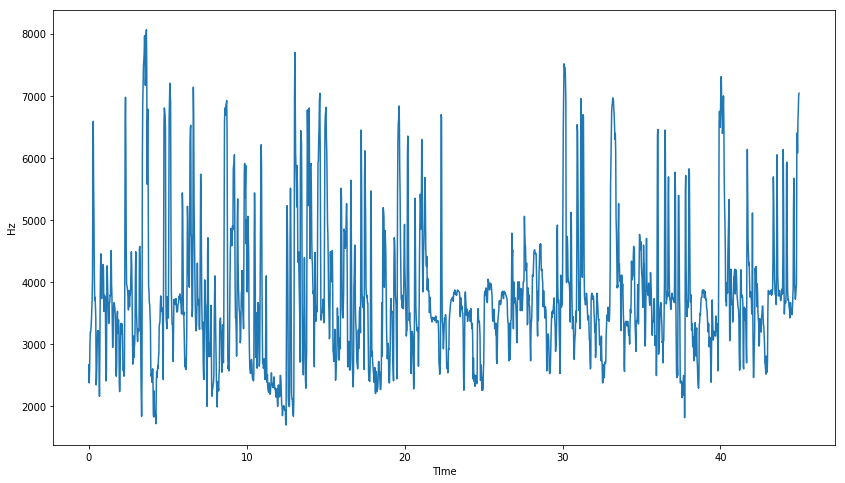

In [9]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr) #1 is default dimension 512 frame
print("Bentuk matrix :",rolloff.shape)
print("Nilai Max matrix :",rolloff.max())
print("Nilai Min matrix :",rolloff.min())

plt.figure(figsize=(14, 8))

plt.ylabel('Hz')
plt.xlabel('TIme')
plt.plot(times, rolloff.T,label='Roll-off frequency')
plt.show()

Bentuk matrix : (1, 1938)
Nilai Max matrix : 0.18994140625
Nilai Min matrix : 0.01220703125


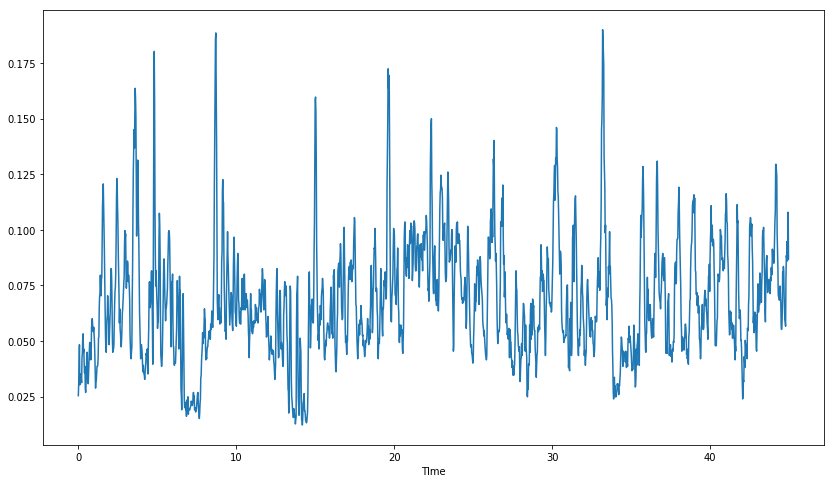

In [10]:
zc = librosa.feature.zero_crossing_rate(y)
print("Bentuk matrix :",zc.shape)
print("Nilai Max matrix :",zc.max())
print("Nilai Min matrix :",zc.min())

plt.figure(figsize=(14, 8))

# plt.ylabel('Hz')
plt.xlabel('TIme')
plt.plot(times, zc.T)
plt.show()

Bentuk matrix : (1, 1938)
Nilai Max matrix : 0.0767656
Nilai Min matrix : 0.000304231


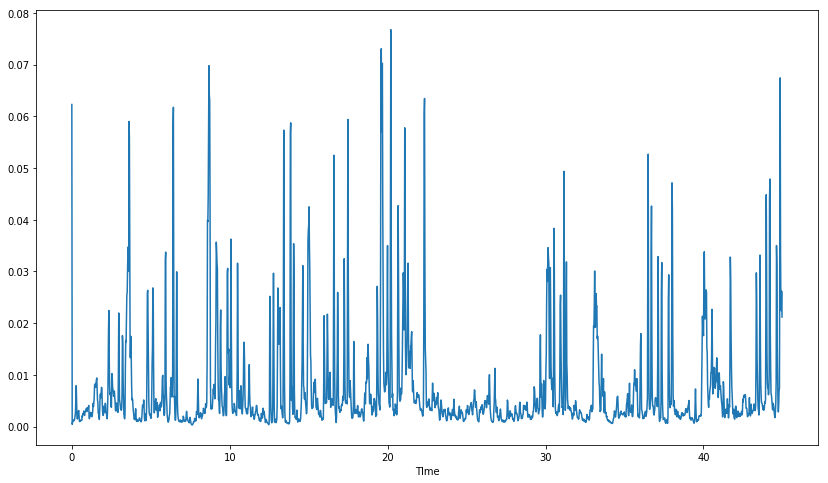

In [11]:
# y, sr = librosa.load(librosa.util.example_audio_file())
flatness = librosa.feature.spectral_flatness(y=y)
print("Bentuk matrix :",flatness.shape)
print("Nilai Max matrix :",flatness.max())
print("Nilai Min matrix :",flatness.min())

plt.figure(figsize=(14, 8))

# plt.ylabel('Hz')
plt.xlabel('TIme')
plt.plot(times, flatness.T)
plt.show()
# zc_to_csv = pandas.DataFrame(zc)
# zc_to_csv.to_csv("zc.csv")


CREST_V2

Niai : 7.45950558346

CREST_MEAN

Niai : 7.75923


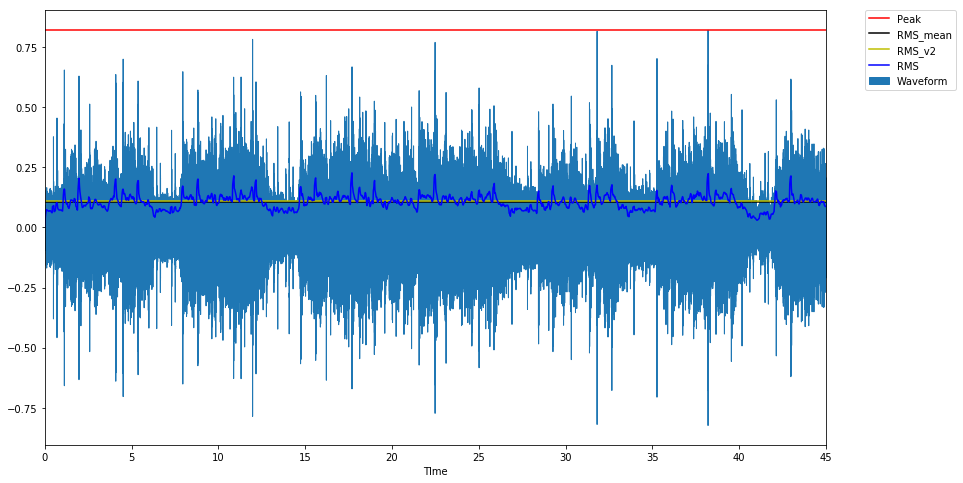

In [18]:
peak = y.max()
rms = librosa.feature.rmse(y=y)
n = rms.size
square = rms**2
rms_mean = rms.mean()
rms_v2 = math.sqrt((1/n)*(square.sum()))
# crest = peak/rms
crest_mean = peak/rms_mean
crest_v2 = peak/rms_v2

print("\nCREST_V2\n\nNiai :",crest_v2 )
print("\nCREST_MEAN\n\nNiai :",crest_mean )

plt.figure(figsize=(14, 8))
wave = librosa.display.waveplot(y, sr=sr, label ="Waveform")
line = plt.axhline(y=peak,color='r', label ="Peak")
mean = plt.axhline(y=rms_mean,color='k', label ="RMS_mean")
v2 = plt.axhline(y=rms_v2,color='y', label ="RMS_v2")
rms_plot = plt.plot(times, rms.T, color='b', label="RMS")
# crest = plt.plot(times, crest.T, color='m',label="Crest Factor")
plt.xlabel('TIme')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()